In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the train and test data
train_data=pd.read_excel('Final_Train.xlsx')
test_data=pd.read_excel('Final_Test.xlsx')

In [3]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [4]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [5]:
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [6]:
#checking the shape of train and test data
print('Train_data:',train_data.shape)
print('\n')
print('Test_data:',test_data.shape)

Train_data: (5961, 7)


Test_data: (1987, 6)


# Train Data

In [7]:
#checking the shape of train data
train_data.shape

(5961, 7)

There are 5961 rows and 7 columns in this dataset

In [8]:
#checking all the columns present in this dataset
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [9]:
#checking the data types of these columns
train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

There is only one Numerical feature present in this dataset :'Fees'and rest are Categorical features

In [10]:
#checking the null values
train_data.isnull().values.any()

True

Yes there are few null values present in this dataset

In [11]:
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

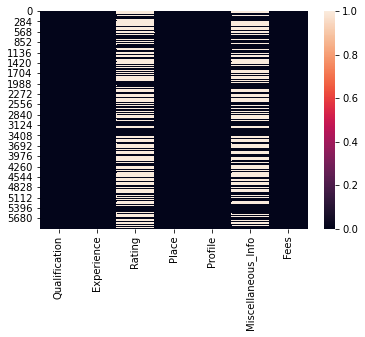

In [12]:
sns.heatmap(train_data.isnull())

From this it's observed that missing values are present in 'Rating','Place' and 'Miscellaneous_Info'. So we will impute the missing values

In [13]:
#Dropping the column Miscellaneous_Info
train_data.drop(['Miscellaneous_Info'],axis=1,inplace=True)
train_data

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [14]:
#imputing the missing value  with mode of the corresponding column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
train_data['Rating']=imp.fit_transform(train_data['Rating'].values.reshape(-1,1))
train_data['Place']=imp.fit_transform(train_data['Place'].values.reshape(-1,1))
train_data

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [15]:
#Again checking for missing values
train_data.isnull().values.any()

False

In [16]:
train_data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

There are no more null values left in this dataset

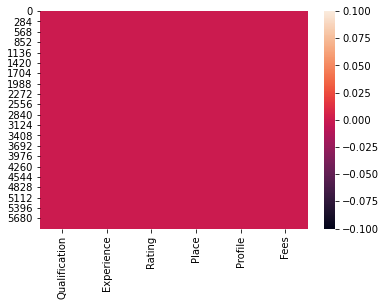

In [17]:
sns.heatmap(train_data.isnull())

In [18]:
#Statistical Summary
train_data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Maximum fees is 950 and minimum is 5

In [19]:
#checking unique values for categorical columns and their value_counts

for column in train_data.columns:
    if train_data[column].dtype==object:
        print(str(column) + ':' + str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print('**********************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                           488
BHMS                                                                                          477
BAMS                                                                                          471
MBBS                                                                                          334
MBBS, MS - ENT                                                                                220
                                                                                             ... 
BAMS, MS - Psychology                                   

In [20]:
#Encoding the attributes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
list1=['Qualification','Experience','Rating','Place','Profile']
for val in list1:
    train_data[val]=le.fit_transform(train_data[val].astype(str))

In [21]:
train_data

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
...,...,...,...,...,...,...
5956,1075,10,49,70,3,300
5957,596,26,0,541,4,100
5958,596,35,48,216,4,600
5959,943,6,41,850,4,100


# Data Visualization

Univariate Analysis

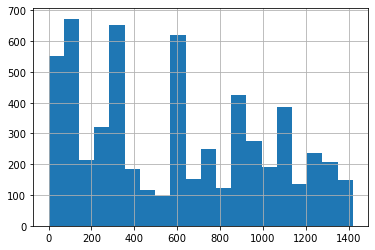

In [22]:
train_data['Qualification'].hist(bins=20)

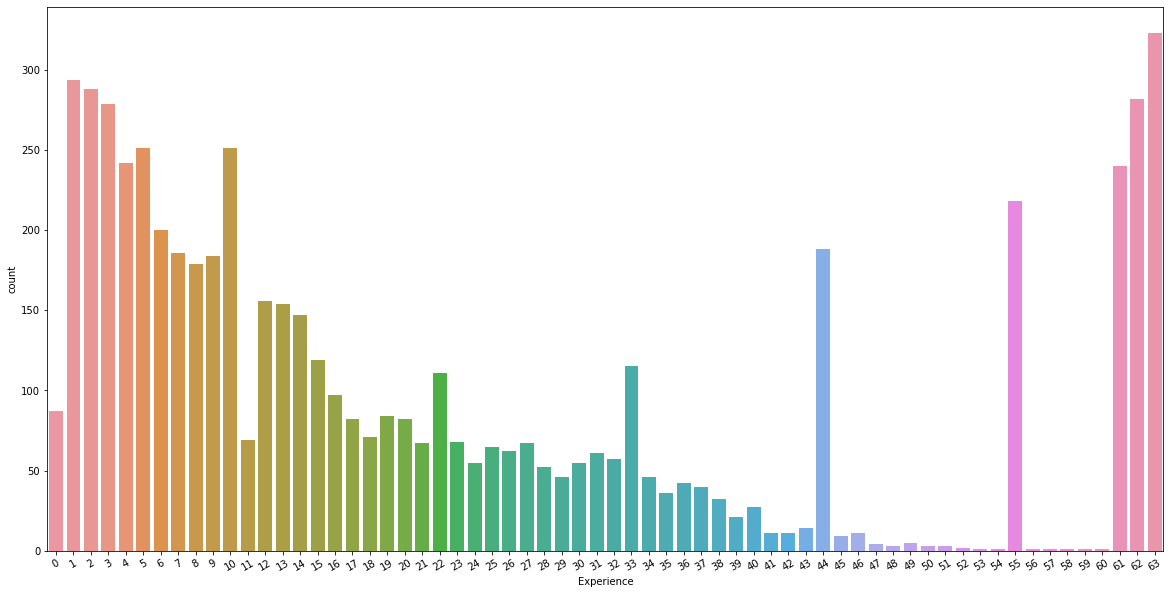

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='Experience',data=train_data)
plt.xticks(rotation=30)
plt.show()

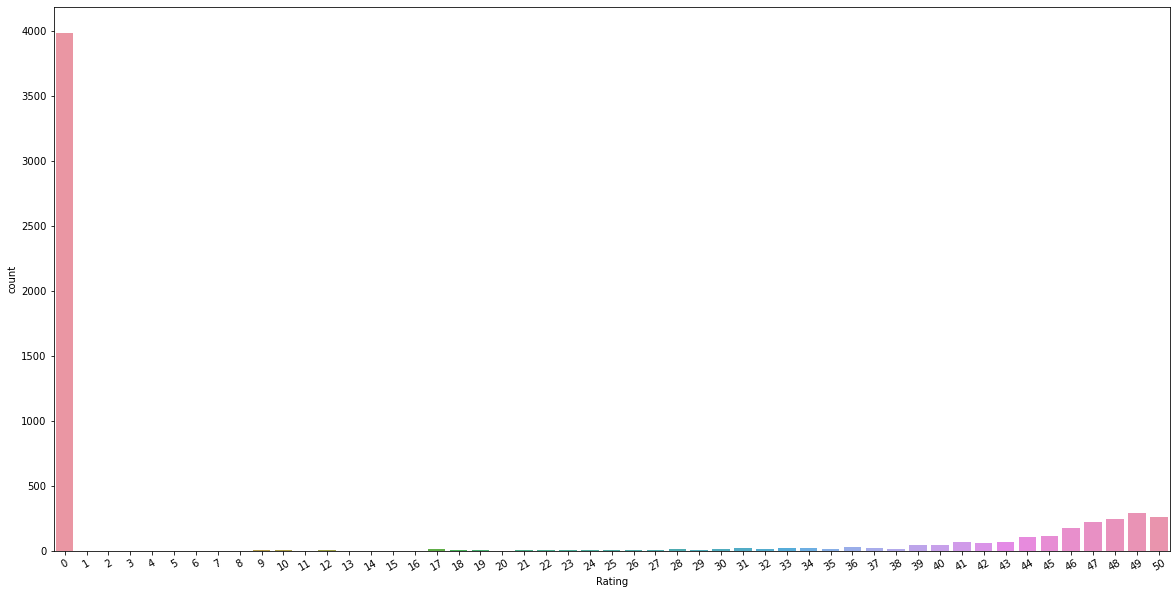

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='Rating',data=train_data)
plt.xticks(rotation=30)
plt.show()

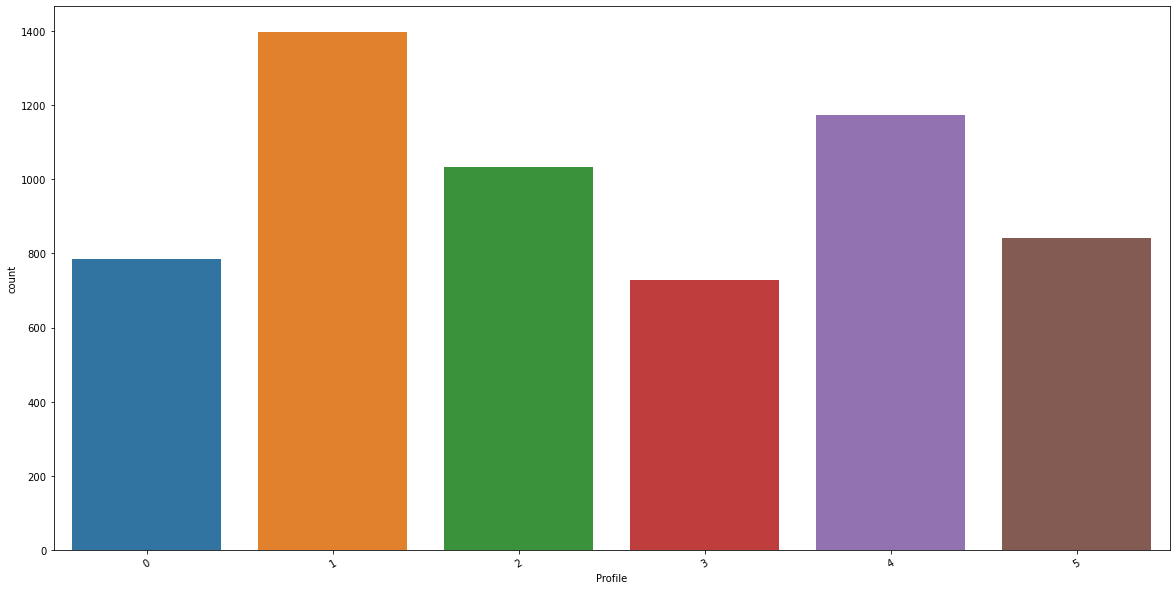

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='Profile',data=train_data)
plt.xticks(rotation=30)
plt.show()

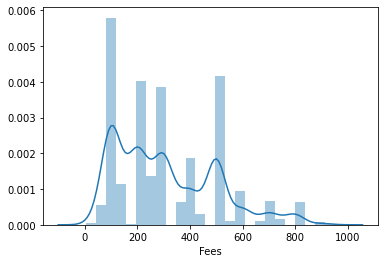

In [26]:
sns.distplot(train_data["Fees"])

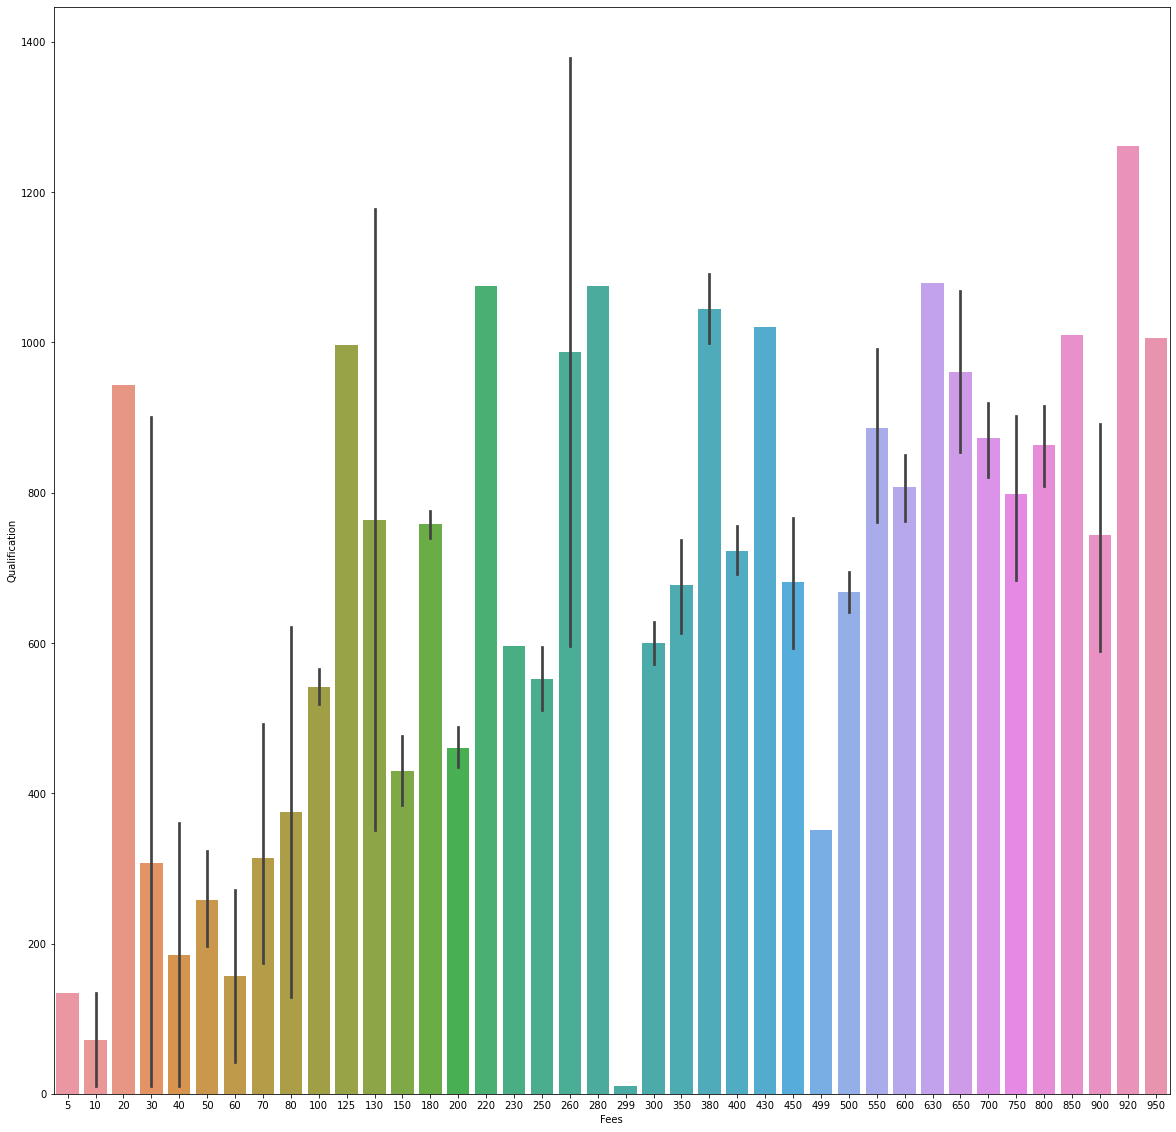

In [27]:
plt.figure(figsize=(20,20))
sns.barplot(y='Qualification',x='Fees',data=train_data)
plt.show()

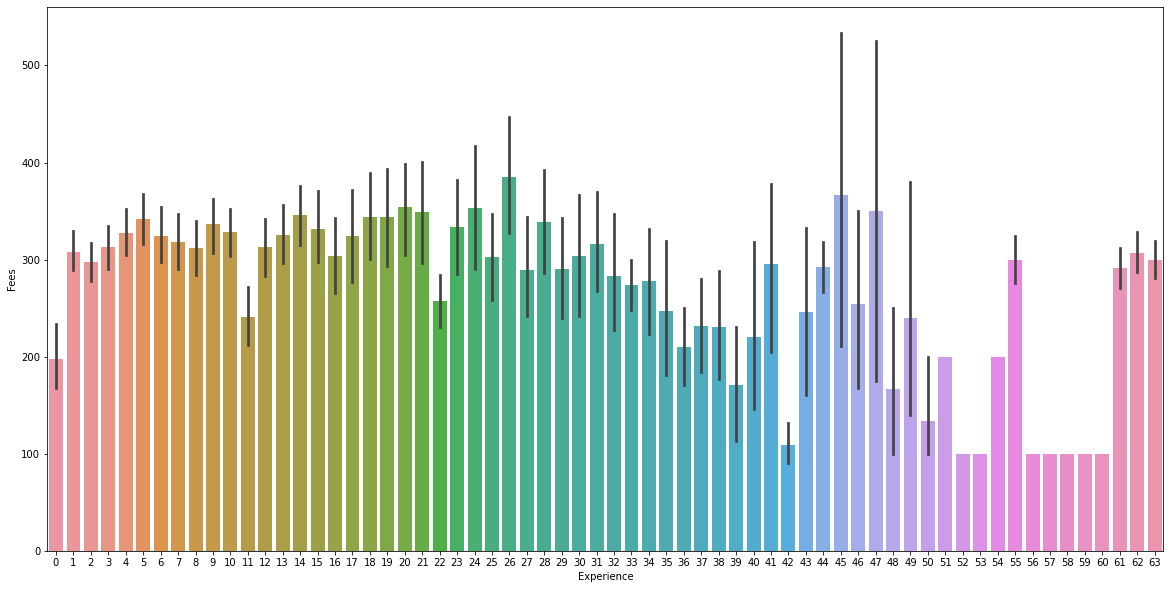

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='Experience',y='Fees',data=train_data)
plt.show()

Experience corresponding to 26 has maximum Fees

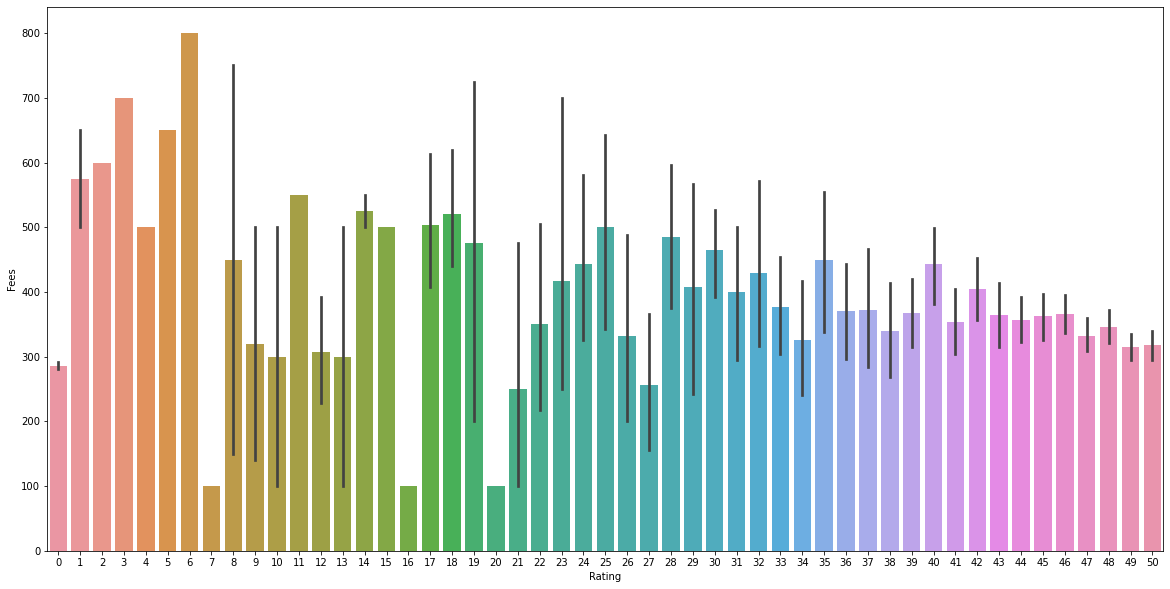

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='Rating',y='Fees',data=train_data)
plt.show()

Rating corresponding to 6 has maximum Fees while 7 has least

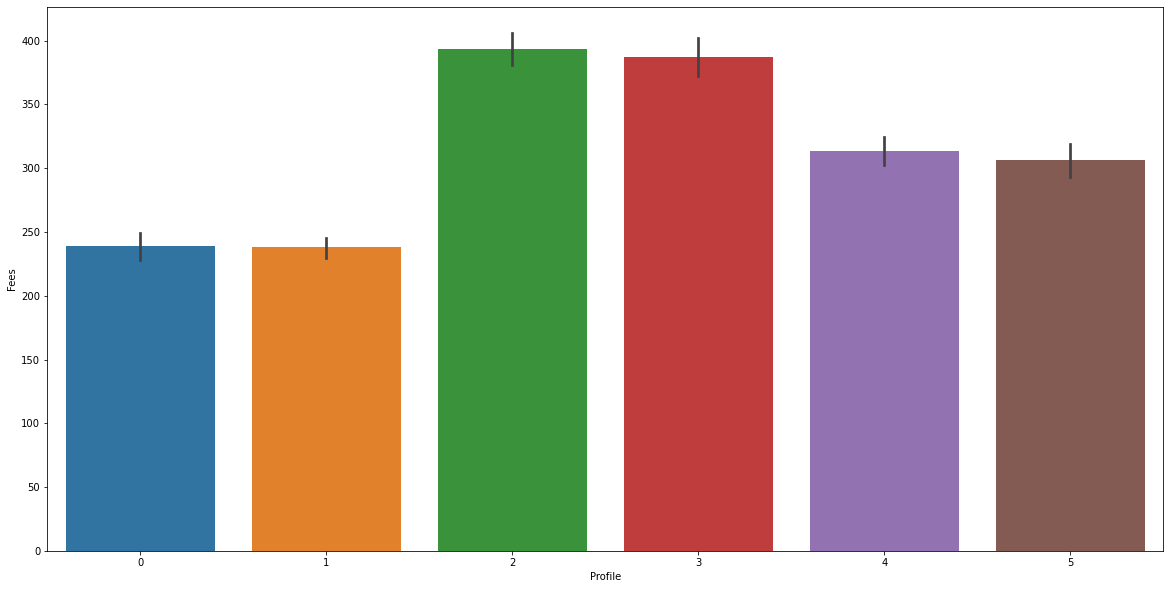

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='Profile',y='Fees',data=train_data)
plt.show()

Profile-2 has max Fees while 0 & 1 has least

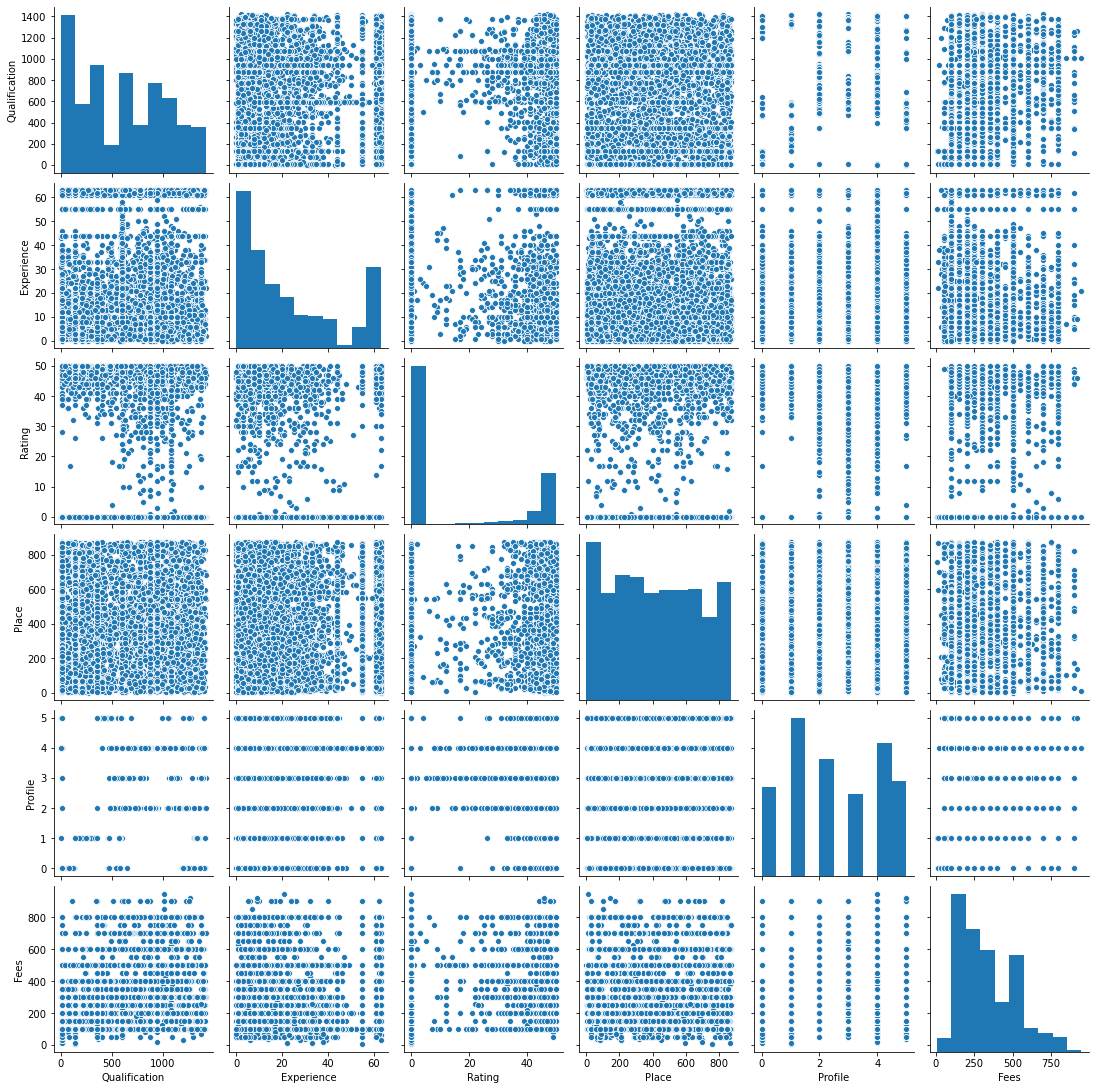

In [31]:
sns.pairplot(data=train_data)

In [32]:
#Checking the correlation between the columns
train_data.corr()

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.003325,0.055188,0.006640,0.393123,0.263214
Experience,0.003325,1.000000,-0.139696,0.001328,-0.032711,-0.048529
Rating,0.055188,-0.139696,1.000000,-0.031150,-0.101605,0.141853
Place,0.006640,0.001328,-0.031150,1.000000,0.019529,-0.052505
Profile,0.393123,-0.032711,-0.101605,0.019529,1.000000,0.145226
Fees,0.263214,-0.048529,0.141853,-0.052505,0.145226,1.000000


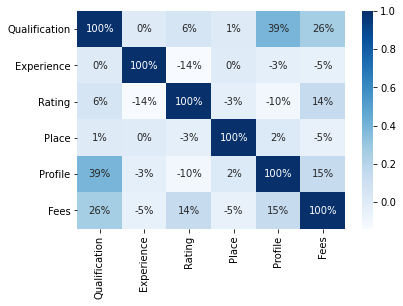

In [33]:
#checking correlation via visualization (heatmap)
sns.heatmap(train_data.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

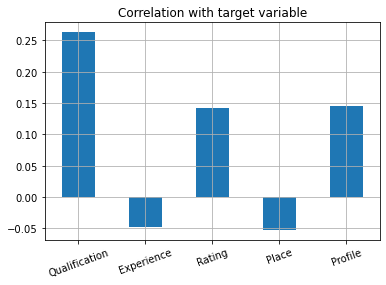

In [34]:
train_data.drop('Fees',axis=1).corrwith(train_data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

Experience and Place are the least correlated column with target variable
Qualification is highly correlated column with target variable 

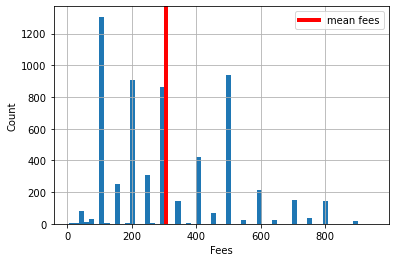

In [81]:
train_data['Fees'].hist(bins=60)
mean_val=np.mean(train_data['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting the Outliers

Qualification       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Experience       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Rating           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Place                  AxesSubplot(0.125,0.125;0.227941x0.343182)
Profile             AxesSubplot(0.398529,0.125;0.227941x0.343182)
Fees                AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

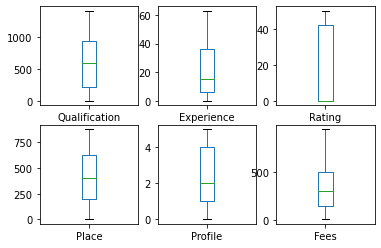

In [36]:
train_data.plot(kind='box',subplots=True,layout=(2,3))

In [37]:
#Detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(train_data))
z

array([[0.47330574, 0.33488263, 0.68765304, 0.44625322, 1.54301587,
        1.08926083],
       [1.26594438, 0.95584022, 1.63068173, 1.74694981, 1.47289258,
        0.22029544],
       [1.30046489, 1.91011789, 0.68765304, 0.16490388, 0.33665249,
        0.04161581],
       ...,
       [0.0020724 , 0.57267077, 1.58336878, 0.76730411, 0.93983418,
        1.52985171],
       [0.83648129, 0.81254231, 1.2521781 , 1.68506049, 0.93983418,
        1.08926083],
       [0.85512557, 0.71701038, 0.68765304, 0.729644  , 0.86971089,
        0.56543832]])

In [38]:
threshold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64))


In [39]:
df=train_data[(z<3).all(axis=1)] #removing the outliers
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
...,...,...,...,...,...,...
5956,1075,10,49,70,3,300
5957,596,26,0,541,4,100
5958,596,35,48,216,4,600
5959,943,6,41,850,4,100


In [40]:
train_data.shape

(5961, 6)

In [41]:
df.shape

(5941, 6)

In [42]:
df.skew() #checking skewness

Qualification    0.242035
Experience       0.825063
Rating           0.817459
Place            0.125450
Profile          0.111080
Fees             0.714016
dtype: float64

In [43]:
#Treating skewness via log method
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

<ipython-input-43-daa4fbe8e966>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.log1p(df[col])


In [44]:
df.skew()

Qualification    0.242035
Experience      -0.360087
Rating           0.735562
Place            0.125450
Profile          0.111080
Fees            -0.306900
dtype: float64

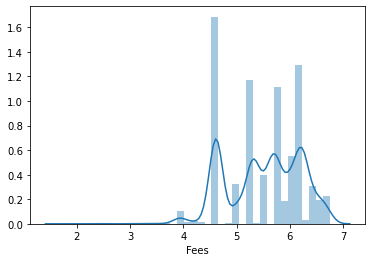

In [45]:
sns.distplot(df['Fees'])

# Test Data

In [46]:
test_data.shape

(1987, 6)

In [47]:
test_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [48]:
test_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [49]:
test_data.isnull().values.any()

True

In [50]:
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

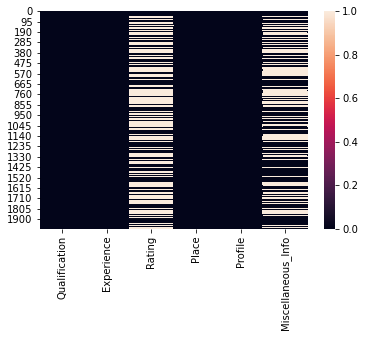

In [51]:
sns.heatmap(test_data.isnull())

In [52]:
test_data.drop(['Miscellaneous_Info'],axis=1,inplace=True)
test_data

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [53]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
test_data['Rating']=imp.fit_transform(test_data['Rating'].values.reshape(-1,1))
test_data['Place']=imp.fit_transform(test_data['Place'].values.reshape(-1,1))

In [54]:
train_data.isnull().values.any()

False

In [55]:
for column in test_data.columns:
    if test_data[column].dtype==object:
        print(str(column) + ':' + str(train_data[column].unique()))
        print(test_data[column].value_counts())
        print('**********************************')
        print('\n')

Qualification:[ 401   73 1135 ... 1229  349 1273]
BAMS                                                                                                                        153
BHMS                                                                                                                        150
BDS                                                                                                                         144
MBBS                                                                                                                        107
MBBS, MD - Dermatology                                                                                                       64
                                                                                                                           ... 
MBBS, Diploma in Family Medicine (DFM), Fellowship in Diabetology                                                             1
BAMS, MD - Ayurveda Medicine, Fellowship in Sexual Med

In [56]:
#Encoding the attributes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
list1=['Qualification','Experience','Rating','Place','Profile']
for val in list1:
    test_data[val]=le.fit_transform(test_data[val].astype(str))

In [57]:
test_data

,Qualification,Experience,Rating,Place,Profile
0,241,28,0,142,4
1,340,24,0,580,3
2,258,34,9,212,2
3,6,0,0,374,0
4,79,7,0,231,1
...,...,...,...,...,...
1982,17,1,0,58,0
1983,548,33,0,96,2
1984,474,56,0,424,4
1985,51,3,34,26,1


# Model Training

In [58]:
#Splitting data into input and output variable
x=df.drop(['Fees'],axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile
0,401,2.833213,0.000000,299,5
1,73,1.386294,3.912023,866,0
2,1135,4.158883,0.000000,457,3
3,464,1.386294,0.000000,68,0
4,10,2.564949,0.000000,337,0


In [59]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [60]:
x=pd.DataFrame(x)

In [61]:
x.columns=['Qualification','Experience','Rating','Place','Profile']

In [62]:
x

,Qualification,Experience,Rating,Place,Profile
0,-0.471682,0.125499,-0.701291,-0.446145,1.544355
1,-1.264132,-1.218392,1.490389,1.746856,-1.471162
2,1.301665,1.356775,-0.701291,0.164955,0.338148
3,-0.319474,-1.218392,-0.701291,-1.339590,-1.471162
4,-1.416340,-0.123663,-0.701291,-0.299172,-1.471162
...,...,...,...,...,...
5936,1.156705,-0.278822,1.490389,-1.331855,0.338148
5937,-0.000561,0.555182,-0.701291,0.489845,0.941252
5938,-0.000561,0.822379,1.479071,-0.767167,0.941252
5939,0.837792,-0.698624,1.392709,1.684972,0.941252


In [63]:
#target column
y=df['Fees'].values
y

array([4.61512052, 5.86078622, 5.70711026, ..., 6.39859493, 4.61512052,
       5.30330491])

In [64]:
#Checking the shape of input and output variable
x.shape

(5941, 5)

In [65]:
y.shape

(5941,)

y=y.reshape(-1,1)
y.shape

In [66]:
y

array([4.61512052, 5.86078622, 5.70711026, ..., 6.39859493, 4.61512052,
       5.30330491])

In [67]:
#Importing all the libraries,metrices required for ML 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [68]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [69]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(4752, 5) (1189, 5)


In [70]:
print(y_train.shape,y_test.shape)

(4752,) (1189,)


In [71]:
#All algorithms using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 0.0883606774624407
Mean Absolute Error: 0.5405219676788393
Mean Squared Error: 0.4216525489170521
RMSE: 0.6493477873351476
r2_score: 0.08706304971749745
****************************************


Score of Lasso() is: 0.0
Mean Absolute Error: 0.576853842531709
Mean Squared Error: 0.4619157738805397
RMSE: 0.6796438581202214
r2_score: -0.00011248355299087187
****************************************


Score of Ridge() is: 0.08836067459704688
Mean Absolute Error: 0.5405226134736645
Mean Squared Error: 0.42165219568399975
RMSE: 0.6493475153444416
r2_score: 0.08706381451663459
****************************************


Score of ElasticNet() is: 0.0
Mean Absolute Error: 0.576853842531709
Mean Squared Error: 0.4619157738805397
RMSE: 0.6796438581202214
r2_score: -0.00011248355299087187
****************************************


Score of SVR() is: 0.1478445029555806
Mean Absolute Error: 0.5269167399240692
Mean Squared Error: 0.42833774844534916
RMSE: 0.654475170228

In [76]:
#Using GridSearchCV for hyper parameter tuning of GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 350}

Using the best params:'learning_rate': 0.1, 'n_estimators': 350 in GradientBoostingRegressor

In [77]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=350)
gbr.fit(x_train,y_train)
Sc=gbr.score(x_train,y_train)
predm=gbr.predict(x_test)
print('Score of',gbr,'is:',Sc)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of GradientBoostingRegressor(n_estimators=350) is: 0.3909711307873547
Mean Absolute Error: 0.4954322275505853
Mean Squared Error: 0.37687608789926824
RMSE: 0.6139023439434551
r2_score: 0.18401037250970598


In [78]:
#Using GridSearchCV for hyper parameter tuning of RandomForestRegressor
rfr=RandomForestRegressor()

parameters={'n_estimators':[150,100,150,200,250,300,350,400,450,500]} #Searching best parameters
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 450}

In [79]:
#Using the best params: 'n_estimators': 450 in RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=450)
rfr.fit(x_train,y_train)
Scr=rfr.score(x_train,y_train)
predm=rfr.predict(x_test)
print('Score of',rfr,'is:',Scr)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of RandomForestRegressor(n_estimators=450) is: 0.8803521446672409
Mean Absolute Error: 0.5191907789194842
Mean Squared Error: 0.41329592567783624
RMSE: 0.6428809576257771
r2_score: 0.10515631194077502


In [80]:
#checking cross_val_score for GradientBoostingRegressor and RandomForestRegressor
from sklearn.model_selection import cross_val_score
print("Mean r2_score for GradientBoostingRegressor:",cross_val_score(gbr,x,y,cv=10,scoring="r2").mean())
print("Standard deviation in r2_score for GradientBoostingRegressor:",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print('\n')
print("Mean r2_score for RandomForestRegressor:",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("Standard deviation in r2_score for RandomForestRegressor:",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2_score for GradientBoostingRegressor: 0.20075953305497243
Standard deviation in r2_score for GradientBoostingRegressor: 0.03875580411243847


Mean r2_score for RandomForestRegressor: 0.14489883801992431
Standard deviation in r2_score for RandomForestRegressor: 0.036444228678965115


I choose RandomForestRegressor as final model.

In [82]:
#Saving the best model
import joblib
joblib.dump(rfr,'Doct_Fees_dataset.obj')

['Doct_Fees_dataset.obj']